In [1]:
import requests
from bs4 import BeautifulSoup
from concurrent.futures import ThreadPoolExecutor
import json

base_url = "https://www.divebuddy.com/"
regions_url = "https://www.divebuddy.com/divesites_regions.aspx"
response = requests.get(regions_url)

sitios_detalles = []

def scrape_site(site_link, site_name):
    site_response = requests.get(site_link)
    if site_response.status_code == 200:
        site_soup = BeautifulSoup(site_response.text, 'html.parser')
        detalles = {
            "Nombre del Sitio": site_name,
            "Ubicación": site_soup.find('span', {'id': 'lblLocation'}).text if site_soup.find('span', {'id': 'lblLocation'}) else 'No disponible',
            "Visibilidad promedio": site_soup.find('span', {'id': 'lblAvgViz'}).text if site_soup.find('span', {'id': 'lblAvgViz'}) else 'No disponible',
            "Tipo de entrada": site_soup.find('span', {'id': 'lblEntryType'}).text if site_soup.find('span', {'id': 'lblEntryType'}) else 'No disponible',
            "Composición del fondo": site_soup.find('span', {'id': 'lblBottomComp'}).text if site_soup.find('span', {'id': 'lblBottomComp'}) else 'No disponible',
            "Vida acuática": site_soup.find('span', {'id': 'lblAquaticLife'}).text if site_soup.find('span', {'id': 'lblAquaticLife'}) else 'No disponible',
            "Temperatura en primavera": site_soup.find('span', {'id': 'lblSpring'}).text if site_soup.find('span', {'id': 'lblSpring'}) else 'No disponible',
            "Temperatura en verano": site_soup.find('span', {'id': 'lblSummer'}).text if site_soup.find('span', {'id': 'lblSummer'}) else 'No disponible',
            "Temperatura en otoño": site_soup.find('span', {'id': 'lblFall'}).text if site_soup.find('span', {'id': 'lblFall'}) else 'No disponible',
            "Temperatura en invierno": site_soup.find('span', {'id': 'lblWinter'}).text if site_soup.find('span', {'id': 'lblWinter'}) else 'No disponible',
            "Profundidad máxima": site_soup.find('span', {'id': 'lblMaxDepth'}).text if site_soup.find('span', {'id': 'lblMaxDepth'}) else 'No disponible',
        }
        return detalles
    else:
        return None

if response.status_code == 200:
    soup = BeautifulSoup(response.text, 'html.parser')
    regions = soup.find_all("div", class_="box")

    with ThreadPoolExecutor(max_workers=10) as executor:
        for region in regions:
            region_name = region.find("h2")
            if region_name:
                print(f"Region: {region_name.text.strip()}")

            country_links = region.find_all("a", class_="alist")
            for country in country_links:
                country_name = country.text.strip()
                country_link = f"{base_url}{country['href']}"
                print(f" - Country: {country_name}, Link: {country_link}")

                country_response = requests.get(country_link)
                if country_response.status_code == 200:
                    country_soup = BeautifulSoup(country_response.text, 'html.parser')
                    dive_sites = country_soup.find_all("a", class_="Large")

                    futures = []
                    for site in dive_sites:
                        site_name = site.text.strip()
                        site_link = f"{base_url}{site['href']}"
                        futures.append(executor.submit(scrape_site, site_link, site_name))

                    for future in futures:
                        detalles = future.result()
                        if detalles:
                            sitios_detalles.append(detalles)

else:
    print(f"Error: {response.status_code}")

with open('detalles_sitios_buceo.json', 'w', encoding='utf-8') as f:
    json.dump(sitios_detalles, f, ensure_ascii=False, indent=4)

print(f"Datos de buceo guardados en detalles_sitios_buceo.json")

Region: Join DiveBuddy.com
Region: Caribbean
 - Country: Anguilla (16), Link: https://www.divebuddy.com/divesites_search.aspx?CountryISO=660
 - Country: Antigua And Barbuda (3), Link: https://www.divebuddy.com/divesites_search.aspx?CountryISO=28
 - Country: Aruba (38), Link: https://www.divebuddy.com/divesites_search.aspx?CountryISO=533
 - Country: Bahamas (201), Link: https://www.divebuddy.com/divesites_search.aspx?CountryISO=44
 - Country: Barbados (15), Link: https://www.divebuddy.com/divesites_search.aspx?CountryISO=52
 - Country: Bonaire (80), Link: https://www.divebuddy.com/divesites_search.aspx?CountryISO=535
 - Country: Cayman Islands (277), Link: https://www.divebuddy.com/divesites_search.aspx?CountryISO=136
 - Country: Cuba (19), Link: https://www.divebuddy.com/divesites_search.aspx?CountryISO=192
 - Country: Curaçao (35), Link: https://www.divebuddy.com/divesites_search.aspx?CountryISO=531
 - Country: Dominica (4), Link: https://www.divebuddy.com/divesites_search.aspx?Countr

In [2]:
import json

with open('detalles_sitios_buceo.json', 'r', encoding='utf-8') as f:
    sitios_detalles = json.load(f)

print("Total de sitios cargados:", len(sitios_detalles))
print("\nPrimeros 5 sitios en el archivo:")
for i, sitio in enumerate(sitios_detalles[:5]):
    print(f"\nSitio {i + 1}:")
    print(json.dumps(sitio, indent=4, ensure_ascii=False))

disponible_contador = {
    "Visibilidad promedio": 0,
    "Tipo de entrada": 0,
    "Composición del fondo": 0,
    "Vida acuática": 0,
    "Temperatura en primavera": 0,
    "Temperatura en verano": 0,
    "Temperatura en otoño": 0,
    "Temperatura en invierno": 0,
}

for sitio in sitios_detalles:
    for clave in disponible_contador.keys():
        if sitio[clave] != "No disponible":
            disponible_contador[clave] += 1

print("\nResumen de disponibilidad de datos:")
for clave, count in disponible_contador.items():
    print(f"{clave}: {count}/{len(sitios_detalles)} disponibles")

Total de sitios cargados: 1433

Primeros 5 sitios en el archivo:

Sitio 1:
{
    "Nombre del Sitio": "Angel Reef",
    "Ubicación": "Anguilla",
    "Visibilidad promedio": "51-60ft/16-18m",
    "Tipo de entrada": "Boat",
    "Composición del fondo": "Sand",
    "Vida acuática": "Plenty To See",
    "Temperatura en primavera": "No disponible",
    "Temperatura en verano": "No disponible",
    "Temperatura en otoño": "No disponible",
    "Temperatura en invierno": "No disponible",
    "Profundidad máxima": "61-70ft/19-21m"
}

Sitio 2:
{
    "Nombre del Sitio": "Anguillita",
    "Ubicación": "Anguilla",
    "Visibilidad promedio": "No disponible",
    "Tipo de entrada": "Boat",
    "Composición del fondo": "Sand",
    "Vida acuática": "Plenty To See",
    "Temperatura en primavera": "No disponible",
    "Temperatura en verano": "No disponible",
    "Temperatura en otoño": "No disponible",
    "Temperatura en invierno": "No disponible",
    "Profundidad máxima": "61-70ft/19-21m"
}

Sitio 3

In [4]:
import json
import pandas as pd
import numpy as np

with open('detalles_sitios_buceo.json', 'r', encoding='utf-8') as f:
    sitios_detalles = json.load(f)

df_sitios = pd.DataFrame(sitios_detalles)

df_sitios.replace("No disponible", np.nan, inplace=True)

print(df_sitios.head())

print("\nCantidad de valores nulos por columna:")
print(df_sitios.isna().sum())

  Nombre del Sitio Ubicación Visibilidad promedio Tipo de entrada  \
0       Angel Reef  Anguilla       51-60ft/16-18m            Boat   
1       Anguillita  Anguilla                  NaN            Boat   
2           Beacon  Anguilla       51-60ft/16-18m            Boat   
3   Captain Turtle  Anguilla       41-50ft/12-15m            Boat   
4     Cathleley H.  Anguilla       51-60ft/16-18m            Boat   

  Composición del fondo  Vida acuática Temperatura en primavera  \
0                  Sand  Plenty To See                      NaN   
1                  Sand  Plenty To See                      NaN   
2                  Sand  Plenty To See                      NaN   
3                  Sand  Plenty To See                      NaN   
4                  Sand  Plenty To See                      NaN   

  Temperatura en verano Temperatura en otoño Temperatura en invierno  \
0                   NaN                  NaN                     NaN   
1                   NaN               

In [8]:
df_sitios['País'] = df_sitios['Ubicación'].apply(lambda x: x.split(',')[-1].strip())

print(df_sitios[['Ubicación', 'País']].head())

paises_unicos = df_sitios['País'].unique()

print("Valores únicos en 'País':")
for pais in paises_unicos:
    print(pais)

print(f"\nNúmero total de países únicos: {len(paises_unicos)}")

  Ubicación      País
0  Anguilla  Anguilla
1  Anguilla  Anguilla
2  Anguilla  Anguilla
3  Anguilla  Anguilla
4  Anguilla  Anguilla
Valores únicos en 'País':
Anguilla
Antigua And Barbuda
Aruba
Bahamas
Barbados
Bonaire
Cayman Islands
Cuba
Curaçao
Dominica
Dominican Republic
Grenada
Guadeloupe
Haiti
Jamaica
Martinique
Puerto Rico
Saint Kitts And Nevis
Saint Lucia
Saint Vincent And The Grenadines
Sint Maarten
Trinidad And Tobago
Turks And Caicos Islands
Virgin Islands (British)
Virgin Islands (U.S.)
Bermuda
Canada
Greenland
NH
FL
NY
NJ
NC
VA
HI
TX 77048
VA 22206
FL 34482
MA
HI 96740
Belize
Costa Rica
Guatemala
Honduras
Mexico
Nicaragua
Panama
Argentina
Brazil
Chile
Colombia
Ecuador
Falkland Islands (Malvinas)
Peru
Venezuela
Australia
Cook Islands
Fiji
French Polynesia
Guam
Marshall Islands
Federated States Of
New Zealand
Northern Mariana Islands
Palau
Papua New Guinea
Samoa
Solomon Islands
Tonga
United States Minor Outlying Islands
Vanuatu
Brunei
Brunei Darussalam
Cambodia
China
East Timo

In [9]:
abreviaturas_estados = ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'IA',
                        'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ',
                        'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT',
                        'VA', 'WA', 'WV', 'WI', 'WY']

df_sitios['País'] = df_sitios['País'].apply(lambda x: 'United States' if x in abreviaturas_estados else x)


print(df_sitios[['Ubicación', 'País']].head(20))

                               Ubicación                 País
0                               Anguilla             Anguilla
1                               Anguilla             Anguilla
2                               Anguilla             Anguilla
3                               Anguilla             Anguilla
4                               Anguilla             Anguilla
5                               Anguilla             Anguilla
6                               Anguilla             Anguilla
7                               Anguilla             Anguilla
8                               Anguilla             Anguilla
9                               Anguilla             Anguilla
10                              Anguilla             Anguilla
11                              Anguilla             Anguilla
12                              Anguilla             Anguilla
13                              Anguilla             Anguilla
14                              Anguilla             Anguilla
15      

In [10]:
import re

def limpiar_pais(pais):

    pais_limpio = re.sub(r'\s*\d{5}(?:-\d{4})?$', '', pais)
    if pais_limpio.strip() in abreviaturas_estados:
        return 'United States'
    return pais

df_sitios['País'] = df_sitios['País'].apply(limpiar_pais)

print(df_sitios[['Ubicación', 'País']].loc[415:420])

                              Ubicación           País
415   4900 Schurmier, Houston, TX 77048  United States
416                           Lanai, HI  United States
417                      Clearwater, FL  United States
418                            Oahu, HI  United States
419                 Arlington, VA 22206  United States
420  9487 NW 115th Ave, Ocala, FL 34482  United States


In [11]:
df_sitios['País'] = df_sitios['País'].replace('Croatia (Local Name: Hrvatska)', 'Croatia')

print(df_sitios[df_sitios['País'] == 'Croatia'].head())

      Nombre del Sitio                                  Ubicación  \
1061     Baron Gautsch     Ac Colone, Bale Valle, Istria, Croatia   
1062      Boeing B-17G             Croatia (Local Name: Hrvatska)   
1063     Cape Kamenjak             Croatia (Local Name: Hrvatska)   
1064  Featherworm City  Vela Luka, Croatia (Local Name: Hrvatska)   
1065      Kamina Drift  Vela Luka, Croatia (Local Name: Hrvatska)   

     Visibilidad promedio Tipo de entrada Composición del fondo  \
1061        31-35ft/9-11m            Boat                  Sand   
1062                  NaN            Boat                   NaN   
1063       41-50ft/12-15m           Shore                  Sand   
1064                  NaN            Boat                   NaN   
1065                  NaN            Boat                   NaN   

            Vida acuática Temperatura en primavera Temperatura en verano  \
1061        Plenty To See          50-55°F/10-13°C       56-60°F/13-16°C   
1062  Might See Something     

In [12]:
df_sitios['País'] = df_sitios['País'].replace('Islamic Republic Of', 'Islamic Republic Of Iran')

print(df_sitios[df_sitios['País'] == 'Islamic Republic Of Iran'].head())

                         Nombre del Sitio  \
1276                            Big Coral   
1277                            Dama Ship   
1278                     Hendorabi Island   
1279  Jazeerat Salamah - Strait of Hormuz   
1280                        Jurassic park   

                                              Ubicación Visibilidad promedio  \
1276  info@dehghani.ir, Kish island, Iran, Islamic R...        31-35ft/9-11m   
1277  info@dehghani.ir, Kish island, Iran, Islamic R...                  NaN   
1278  info@dehghani.ir, Kish island, Iran, Islamic R...                  NaN   
1279                          Iran, Islamic Republic Of      91-100ft/28-30m   
1280  info@dehghani.ir, Kish island, Iran, Islamic R...       36-40ft/11-12m   

     Tipo de entrada Composición del fondo Vida acuática  \
1276           Shore                  Sand           NaN   
1277            Boat                   NaN           NaN   
1278            Boat                  Sand   Big Animals   
1279    

In [13]:
df_sitios['País'] = df_sitios['País'].replace('United Republic Of', 'United Republic Of Tanzania')

print(df_sitios[df_sitios['País'] == 'United Republic Of Tanzania'].head())

              Nombre del Sitio  \
1413  Blue Bay Lake Tanganyika   
1414                 Chakatuni   
1415              Coral Garden   
1416                      Haji   
1417                  Kichwani   

                                              Ubicación Visibilidad promedio  \
1413        Kipili, Rukwa, Tanzania, United Republic Of       41-50ft/12-15m   
1414     Nungwi, Zanzibar, Tanzania, United Republic Of                  NaN   
1415     Nungwi, Zanzibar, Tanzania, United Republic Of                  NaN   
1416     Nungwi, Zanzibar, Tanzania, United Republic Of                  NaN   
1417  Mnemba Island, Zanzibar, Tanzania, United Repu...                  NaN   

     Tipo de entrada Composición del fondo        Vida acuática  \
1413            Boat                  Sand  Might See Something   
1414            Boat                  Sand        Plenty To See   
1415            Boat                  Sand        Plenty To See   
1416            Boat                  Sand    

In [14]:
df_sitios.dtypes

,0
Nombre del Sitio,object
Ubicación,object
Visibilidad promedio,object
Tipo de entrada,object
Composición del fondo,object
Vida acuática,object
Temperatura en primavera,object
Temperatura en verano,object
Temperatura en otoño,object
Temperatura en invierno,object


In [15]:
import pandas as pd
import re

def extraer_promedio_m(texto):
    if isinstance(texto, str):
        match = re.search(r'(\d+)-(\d+)m', texto)
        if match:
            return (float(match.group(1)) + float(match.group(2))) / 2
        match = re.search(r'Over \d+ft/(\d+)m', texto)
        if match:
            return float(match.group(1))
        match = re.search(r'Under \d+ft/(\d+)m', texto)
        if match:
            return float(match.group(1))
    return None

def extraer_temperatura_c(texto):
    if isinstance(texto, str):
        match = re.search(r'(\d+)-(\d+)°C', texto)
        if match:
            return (float(match.group(1)) + float(match.group(2))) / 2
        match = re.search(r'Over \d+°F/(\d+)°C', texto)
        if match:
            return float(match.group(1))
        match = re.search(r'Under \d+°F/(\d+)°C', texto)
        if match:
            return float(match.group(1))
    return None

df_sitios['Visibilidad promedio (m)'] = df_sitios['Visibilidad promedio'].apply(extraer_promedio_m)
df_sitios['Profundidad máxima (m)'] = df_sitios['Profundidad máxima'].apply(extraer_promedio_m)

df_sitios['Temperatura en primavera (°C)'] = df_sitios['Temperatura en primavera'].apply(extraer_temperatura_c)
df_sitios['Temperatura en verano (°C)'] = df_sitios['Temperatura en verano'].apply(extraer_temperatura_c)
df_sitios['Temperatura en otoño (°C)'] = df_sitios['Temperatura en otoño'].apply(extraer_temperatura_c)
df_sitios['Temperatura en invierno (°C)'] = df_sitios['Temperatura en invierno'].apply(extraer_temperatura_c)

print(df_sitios[['Visibilidad promedio (m)', 'Profundidad máxima (m)',
                 'Temperatura en primavera (°C)', 'Temperatura en verano (°C)',
                 'Temperatura en otoño (°C)', 'Temperatura en invierno (°C)']].head())

df_sitios[['Visibilidad promedio (m)', 'Profundidad máxima (m)',
           'Temperatura en primavera (°C)', 'Temperatura en verano (°C)',
           'Temperatura en otoño (°C)', 'Temperatura en invierno (°C)']] = df_sitios[
               ['Visibilidad promedio (m)', 'Profundidad máxima (m)',
                'Temperatura en primavera (°C)', 'Temperatura en verano (°C)',
                'Temperatura en otoño (°C)', 'Temperatura en invierno (°C)']
           ].astype(float)


   Visibilidad promedio (m)  Profundidad máxima (m)  \
0                      17.0                    20.0   
1                       NaN                    20.0   
2                      17.0                    20.0   
3                      13.5                    20.0   
4                      17.0                    17.0   

   Temperatura en primavera (°C)  Temperatura en verano (°C)  \
0                            NaN                         NaN   
1                            NaN                         NaN   
2                            NaN                         NaN   
3                            NaN                         NaN   
4                            NaN                         NaN   

   Temperatura en otoño (°C)  Temperatura en invierno (°C)  
0                        NaN                           NaN  
1                        NaN                           NaN  
2                        NaN                           NaN  
3                        NaN            

In [16]:
nulos_por_columna = df_sitios.isnull().sum()

print("Cantidad de valores nulos por columna:")
print(nulos_por_columna)

Cantidad de valores nulos por columna:
Nombre del Sitio                   0
Ubicación                          0
Visibilidad promedio             522
Tipo de entrada                  201
Composición del fondo            374
Vida acuática                    239
Temperatura en primavera         907
Temperatura en verano            827
Temperatura en otoño             945
Temperatura en invierno          880
Profundidad máxima               389
País                               0
Visibilidad promedio (m)         522
Profundidad máxima (m)           389
Temperatura en primavera (°C)    907
Temperatura en verano (°C)       827
Temperatura en otoño (°C)        945
Temperatura en invierno (°C)     880
dtype: int64


In [17]:
columnas_a_convertir = [
    'Visibilidad promedio (m)', 'Profundidad máxima (m)',
    'Temperatura en primavera (°C)', 'Temperatura en verano (°C)',
    'Temperatura en otoño (°C)', 'Temperatura en invierno (°C)'
]

df_sitios[columnas_a_convertir] = df_sitios[columnas_a_convertir].apply(pd.to_numeric, errors='coerce')

for columna in columnas_a_convertir:
    promedios_pais = df_sitios.groupby('País')[columna].transform('mean')
    df_sitios[columna].fillna(promedios_pais, inplace=True)

print(df_sitios.head())

  Nombre del Sitio Ubicación Visibilidad promedio Tipo de entrada  \
0       Angel Reef  Anguilla       51-60ft/16-18m            Boat   
1       Anguillita  Anguilla                  NaN            Boat   
2           Beacon  Anguilla       51-60ft/16-18m            Boat   
3   Captain Turtle  Anguilla       41-50ft/12-15m            Boat   
4     Cathleley H.  Anguilla       51-60ft/16-18m            Boat   

  Composición del fondo  Vida acuática Temperatura en primavera  \
0                  Sand  Plenty To See                      NaN   
1                  Sand  Plenty To See                      NaN   
2                  Sand  Plenty To See                      NaN   
3                  Sand  Plenty To See                      NaN   
4                  Sand  Plenty To See                      NaN   

  Temperatura en verano Temperatura en otoño Temperatura en invierno  \
0                   NaN                  NaN                     NaN   
1                   NaN               

In [18]:
nulos_por_columna = df_sitios.isnull().sum()

print("Cantidad de valores nulos por columna:")
print(nulos_por_columna)

Cantidad de valores nulos por columna:
Nombre del Sitio                   0
Ubicación                          0
Visibilidad promedio             522
Tipo de entrada                  201
Composición del fondo            374
Vida acuática                    239
Temperatura en primavera         907
Temperatura en verano            827
Temperatura en otoño             945
Temperatura en invierno          880
Profundidad máxima               389
País                               0
Visibilidad promedio (m)          25
Profundidad máxima (m)            15
Temperatura en primavera (°C)    111
Temperatura en verano (°C)        97
Temperatura en otoño (°C)        150
Temperatura en invierno (°C)      95
dtype: int64


In [19]:
df_sitios.describe()


,Visibilidad promedio (m),Profundidad máxima (m),Temperatura en primavera (°C),Temperatura en verano (°C),Temperatura en otoño (°C),Temperatura en invierno (°C)
count,1408.000000,1418.000000,1322.000000,1336.000000,1283.000000,1338.000000
mean,18.991119,26.209971,22.604111,24.675526,23.304570,21.310247
std,9.339946,11.090489,5.712680,4.659934,5.348357,6.315402
min,2.000000,2.500000,10.000000,10.000000,10.000000,10.000000
25%,11.500000,17.000000,19.944444,23.250000,20.000000,17.000000
50%,17.000000,26.000000,25.500000,26.125000,25.500000,24.250000
75%,25.583333,32.500000,27.750000,28.000000,27.500000,26.333333
max,46.000000,46.000000,29.000000,29.000000,29.000000,29.000000


In [20]:
for columna in columnas_a_convertir:
    promedio_global = df_sitios[columna].mean()
    df_sitios[columna].fillna(promedio_global, inplace=True)

print(df_sitios.head())

nulos_por_columna = df_sitios.isnull().sum()
print("\nCantidad de valores nulos por columna después de completar con el promedio global:")
print(nulos_por_columna)

  Nombre del Sitio Ubicación Visibilidad promedio Tipo de entrada  \
0       Angel Reef  Anguilla       51-60ft/16-18m            Boat   
1       Anguillita  Anguilla                  NaN            Boat   
2           Beacon  Anguilla       51-60ft/16-18m            Boat   
3   Captain Turtle  Anguilla       41-50ft/12-15m            Boat   
4     Cathleley H.  Anguilla       51-60ft/16-18m            Boat   

  Composición del fondo  Vida acuática Temperatura en primavera  \
0                  Sand  Plenty To See                      NaN   
1                  Sand  Plenty To See                      NaN   
2                  Sand  Plenty To See                      NaN   
3                  Sand  Plenty To See                      NaN   
4                  Sand  Plenty To See                      NaN   

  Temperatura en verano Temperatura en otoño Temperatura en invierno  \
0                   NaN                  NaN                     NaN   
1                   NaN               

In [21]:
def completar_con_moda(df, columna, grupo):

    modas_por_grupo = df.groupby(grupo)[columna].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)


    df[columna] = df.apply(lambda row: modas_por_grupo[row[grupo]] if pd.isnull(row[columna]) else row[columna], axis=1)

columnas_categoricas = ['Tipo de entrada', 'Composición del fondo', 'Vida acuática']


for columna in columnas_categoricas:
    completar_con_moda(df_sitios, columna, 'País')

nulos_por_columna = df_sitios.isnull().sum()
print("\nCantidad de valores nulos por columna después de completar con la moda del país:")
print(nulos_por_columna)


Cantidad de valores nulos por columna después de completar con la moda del país:
Nombre del Sitio                   0
Ubicación                          0
Visibilidad promedio             522
Tipo de entrada                    9
Composición del fondo             22
Vida acuática                     14
Temperatura en primavera         907
Temperatura en verano            827
Temperatura en otoño             945
Temperatura en invierno          880
Profundidad máxima               389
País                               0
Visibilidad promedio (m)           0
Profundidad máxima (m)             0
Temperatura en primavera (°C)      0
Temperatura en verano (°C)         0
Temperatura en otoño (°C)          0
Temperatura en invierno (°C)       0
dtype: int64


In [22]:
for columna in columnas_categoricas:
    moda_global = df_sitios[columna].mode().iloc[0]  # Obtener la moda global de la columna
    df_sitios[columna].fillna(moda_global, inplace=True)

nulos_por_columna = df_sitios.isnull().sum()
print("\nCantidad de valores nulos por columna después de completar con la moda global:")
print(nulos_por_columna)


Cantidad de valores nulos por columna después de completar con la moda global:
Nombre del Sitio                   0
Ubicación                          0
Visibilidad promedio             522
Tipo de entrada                    0
Composición del fondo              0
Vida acuática                      0
Temperatura en primavera         907
Temperatura en verano            827
Temperatura en otoño             945
Temperatura en invierno          880
Profundidad máxima               389
País                               0
Visibilidad promedio (m)           0
Profundidad máxima (m)             0
Temperatura en primavera (°C)      0
Temperatura en verano (°C)         0
Temperatura en otoño (°C)          0
Temperatura en invierno (°C)       0
dtype: int64


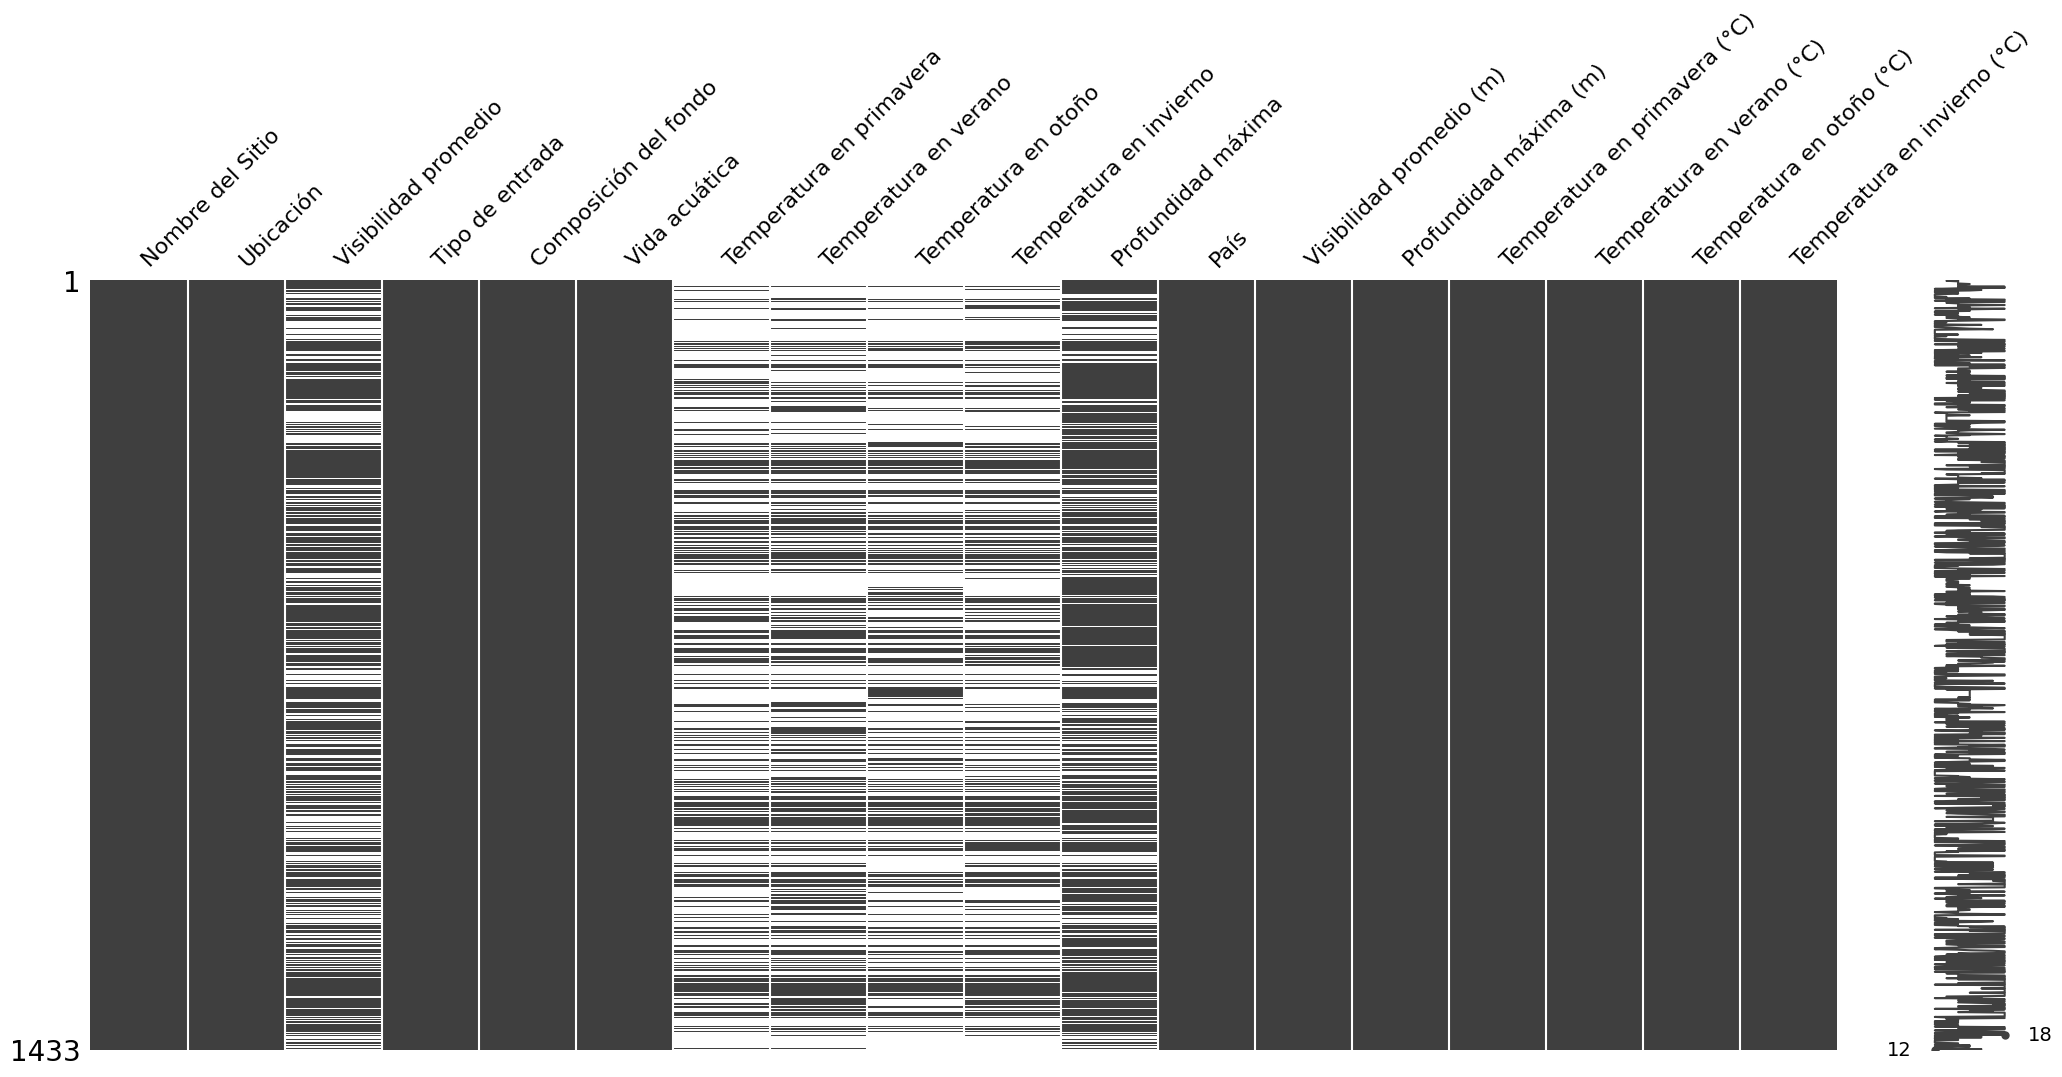

In [24]:
import missingno as msno
import matplotlib.pyplot as plt
msno.matrix(df_sitios)
plt.show()

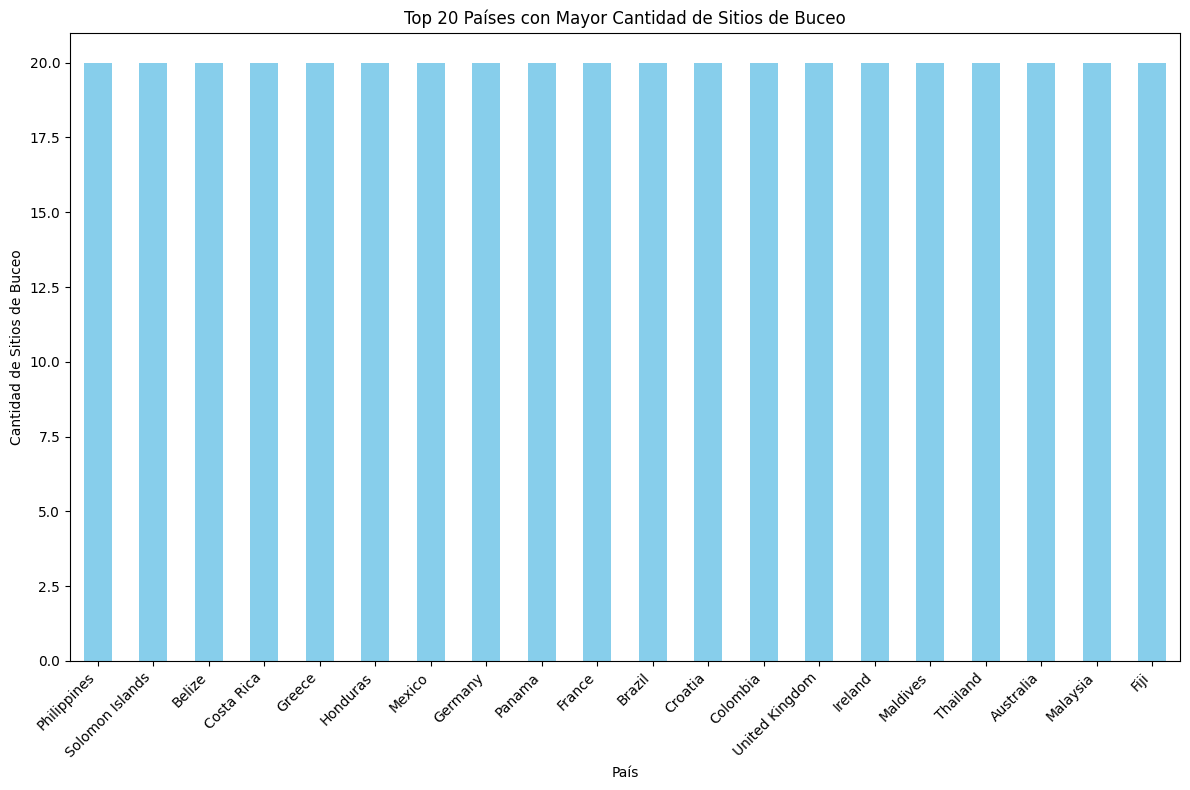

In [27]:
import matplotlib.pyplot as plt

top_paises = df_sitios['País'].value_counts().nlargest(20)

plt.figure(figsize=(12, 8))
top_paises.plot(kind='bar', color='skyblue')
plt.title('Top 20 Países con Mayor Cantidad de Sitios de Buceo')
plt.xlabel('País')
plt.ylabel('Cantidad de Sitios de Buceo')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

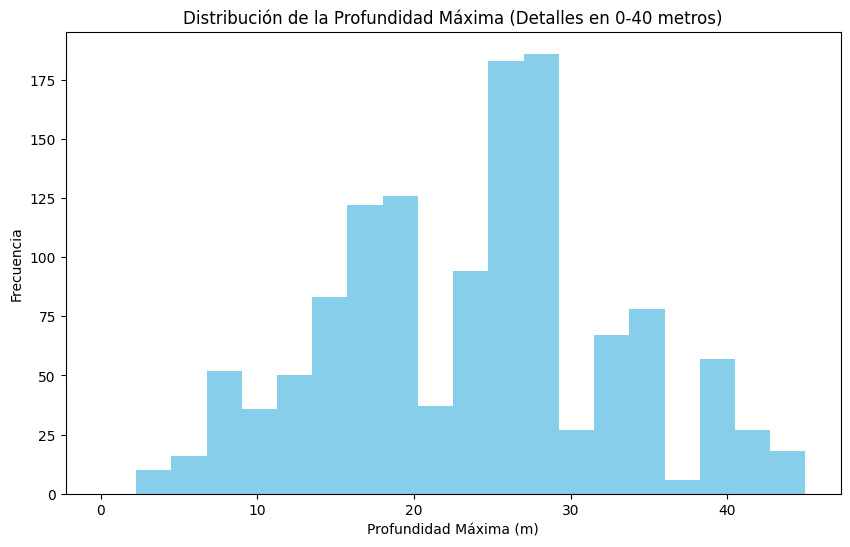

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df_sitios['Profundidad máxima (m)'].dropna(), bins=20, range=(0, 45), color='skyblue')

plt.title('Distribución de la Profundidad Máxima (Detalles en 0-40 metros)')
plt.xlabel('Profundidad Máxima (m)')
plt.ylabel('Frecuencia')

plt.show()

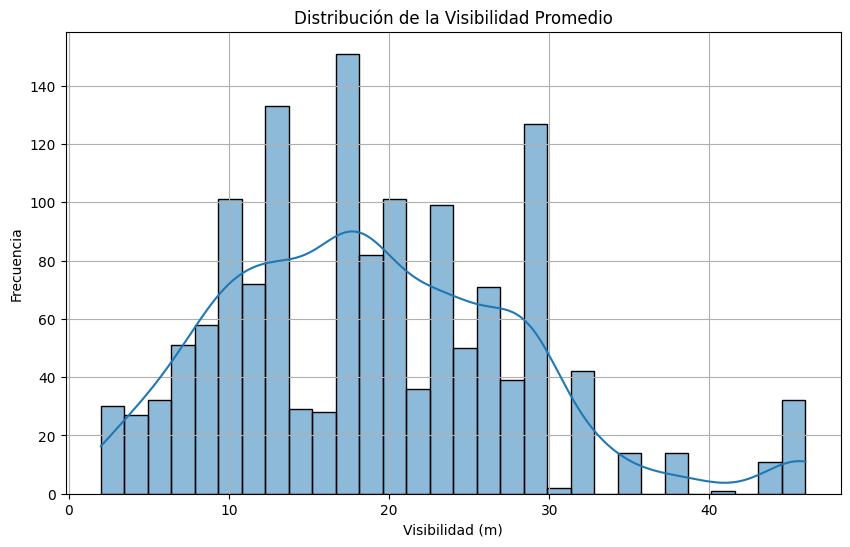

In [57]:

plt.figure(figsize=(10, 6))
sns.histplot(df_sitios['Visibilidad promedio (m)'], bins=30, kde=True)
plt.title('Distribución de la Visibilidad Promedio')
plt.xlabel('Visibilidad (m)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

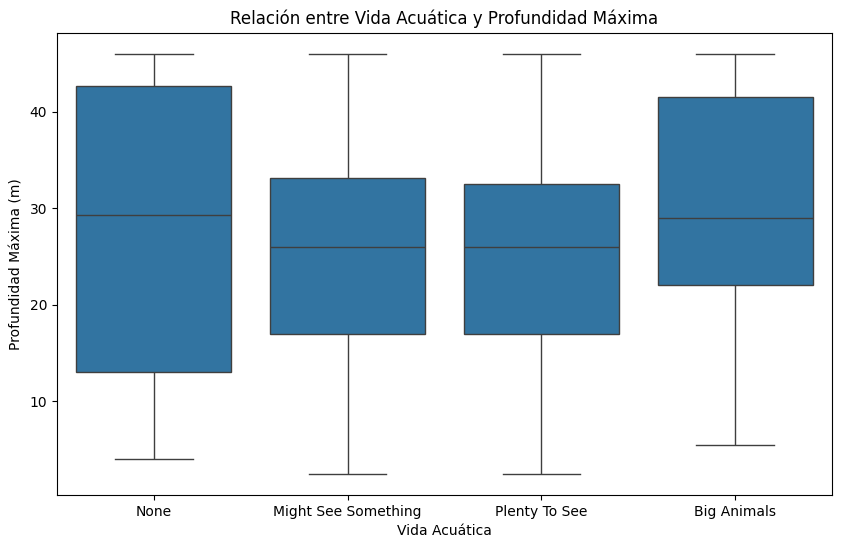

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

df_vida_acuatica = df_sitios[df_sitios['Vida acuática'] != 'No disponible']

plt.figure(figsize=(10, 6))
sns.boxplot(x='Vida acuática', y='Profundidad máxima (m)', data=df_vida_acuatica,
            order=['None', 'Might See Something', 'Plenty To See', 'Big Animals'])
plt.title('Relación entre Vida Acuática y Profundidad Máxima')
plt.xlabel('Vida Acuática')
plt.ylabel('Profundidad Máxima (m)')
plt.show()

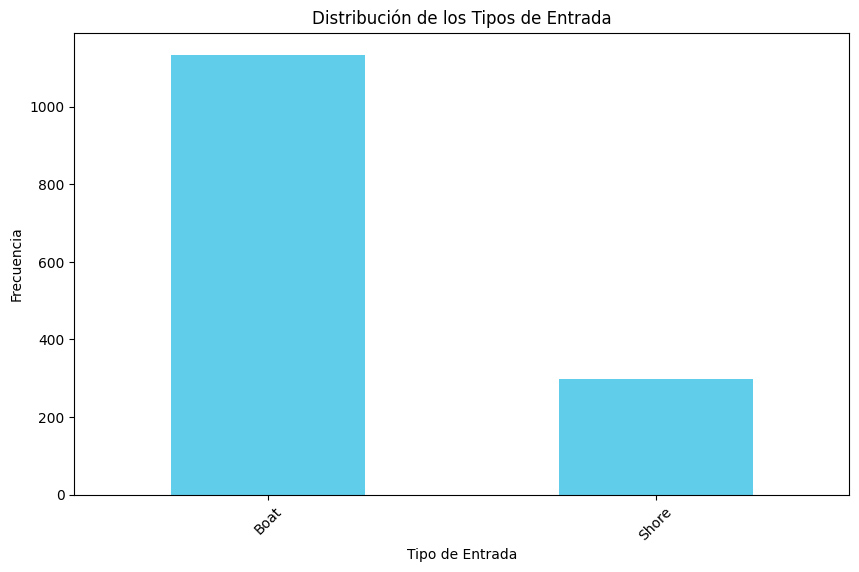

In [76]:
plt.figure(figsize=(10, 6))
df_sitios['Tipo de entrada'].value_counts().plot(kind='bar', color='#60CEEB')
plt.title('Distribución de los Tipos de Entrada')
plt.xlabel('Tipo de Entrada')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

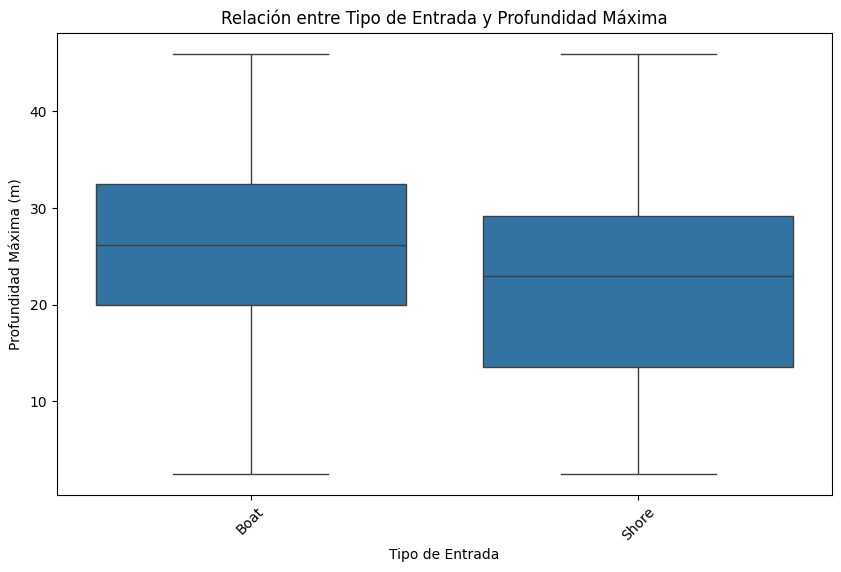

In [75]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Tipo de entrada', y='Profundidad máxima (m)', data=df_sitios)
plt.title('Relación entre Tipo de Entrada y Profundidad Máxima')
plt.xlabel('Tipo de Entrada')
plt.ylabel('Profundidad Máxima (m)')
plt.xticks(rotation=45)
plt.show()

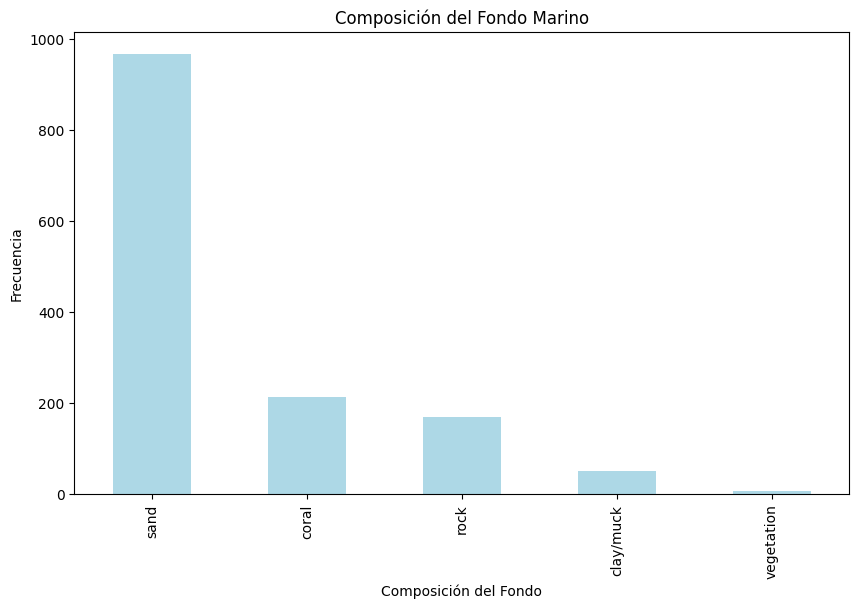

In [85]:
df_sitios['Composición del fondo'] = df_sitios['Composición del fondo'].str.lower().str.strip()

df_filtrado = df_sitios[~df_sitios['Composición del fondo'].str.contains("no bottom", na=False)]

plt.figure(figsize=(10, 6))
df_filtrado['Composición del fondo'].value_counts().plot(kind='bar', color='lightblue')
plt.title('Composición del Fondo Marino')
plt.xlabel('Composición del Fondo')
plt.ylabel('Frecuencia')
plt.show()

<ipython-input-83-b862298e3220>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Composición del fondo', y='Visibilidad promedio (m)', data=df_filtrado, palette='coolwarm')


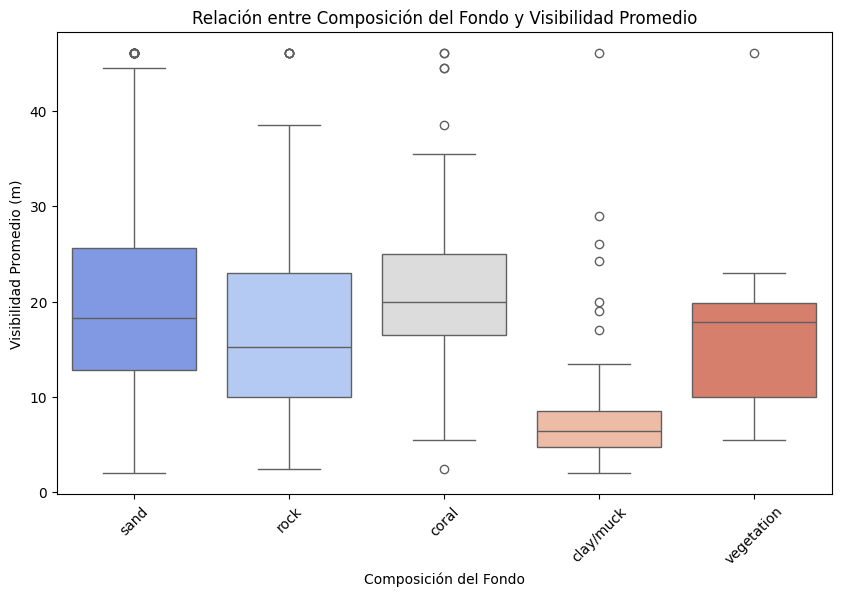

In [83]:
df_sitios['Composición del fondo'] = df_sitios['Composición del fondo'].str.lower().str.strip()


df_filtrado = df_sitios[~df_sitios['Composición del fondo'].str.contains("no bottom", na=False)]

plt.figure(figsize=(10, 6))
sns.boxplot(x='Composición del fondo', y='Visibilidad promedio (m)', data=df_filtrado, palette='coolwarm')
plt.title('Relación entre Composición del Fondo y Visibilidad Promedio')
plt.xlabel('Composición del Fondo')
plt.ylabel('Visibilidad Promedio (m)')
plt.xticks(rotation=45)
plt.show()

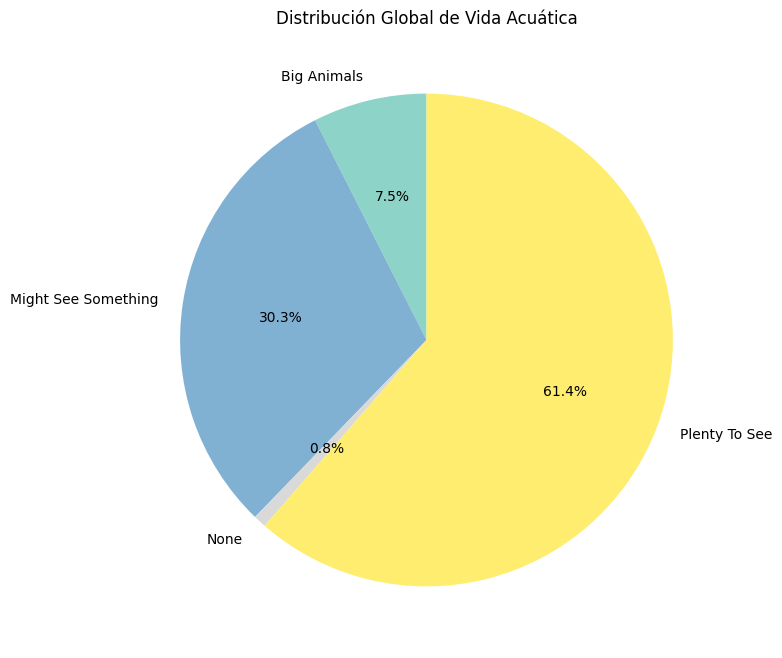

In [90]:
vida_acuatica_global = vida_acuatica_pais.sum()

# Crear gráfico circular
vida_acuatica_global.plot(kind='pie', autopct='%1.1f%%', startangle=90, figsize=(8, 8), colormap='Set3')
plt.title('Distribución Global de Vida Acuática')
plt.ylabel('')
plt.show()